# Visualisasi Ekstraksi Fitur

Pemahaman bagaimana setiap metode ekstraksi fitur HOG, Color Histogram, dan LBP bekerja. Memvisualisasikan output dari setiap metode pada gambar sampel untuk mendapatkan intuisi tentang fitur apa yang diekstrak oleh model.

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.feature import hog

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.config import DATA_RAW_PATH, CLASSES
from src.preprocessing.image_preprocessing import preprocess_image_for_feature_extraction
from src.features.feature_extraction import extract_hog_features, extract_color_histogram, extract_lbp_features, extract_features
from src.utils.dataset_loader import load_images_from_folder

## Gambar Sampel

Muat satu gambar acak dan melakukan pra-pemrosesan.

2025-10-01 20:47:32,296 - INFO - dataset_loader - Memuat gambar dari 'c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\data\raw'...
Loading Sunrise: 100%|██████████| 357/357 [00:01<00:00, 265.19it/s]
2025-10-01 20:47:35,322 - INFO - dataset_loader - Total gambar yang berhasil dimuat (termasuk augmentasi): 1123


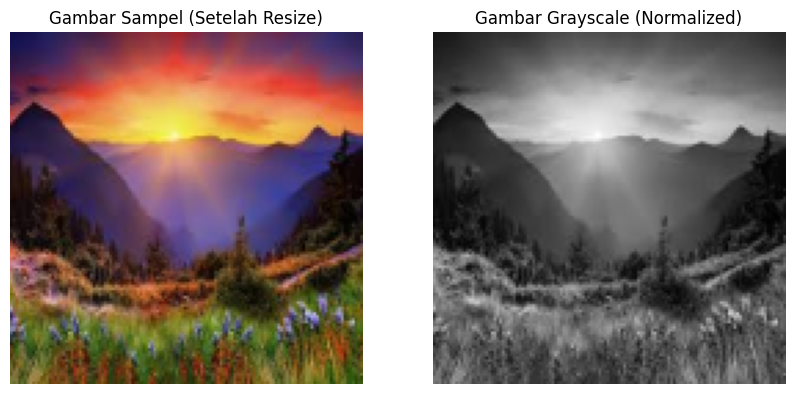

In [2]:
images, _, _ = load_images_from_folder(DATA_RAW_PATH, use_augmentation=False)
sample_image = random.choice(images)

# Lakukan pra-pemrosesan
normalized_gray, normalized_color, resized_uint8 = preprocess_image_for_feature_extraction(sample_image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(resized_uint8, cv2.COLOR_BGR2RGB))
axes[0].set_title('Gambar Sampel (Setelah Resize)')
axes[0].axis('off')

axes[1].imshow(normalized_gray, cmap='gray')
axes[1].set_title('Gambar Grayscale (Normalized)')
axes[1].axis('off')

plt.show()

## Visualisasi Fitur HOG (Histogram of Oriented Gradients)

HOG menangkap informasi tentang gradien atau tepi pada gambar.

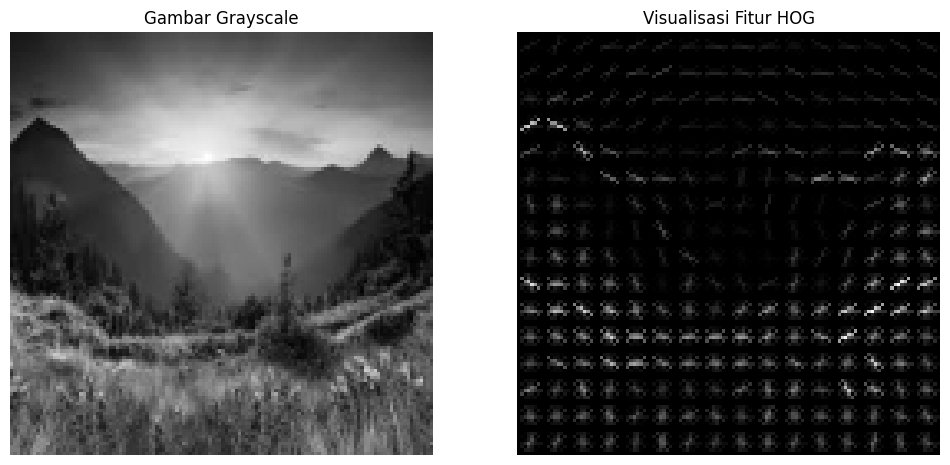

Ukuran vektor fitur HOG: (8100,)


In [3]:
from src.config import HOG_ORIENTATIONS, HOG_PIXELS_PER_CELL, HOG_CELLS_PER_BLOCK

# Ekstrak fitur HOG bersama dengan visualisasinya
hog_feats, hog_image = hog(
    normalized_gray,
    orientations=HOG_ORIENTATIONS,
    pixels_per_cell=HOG_PIXELS_PER_CELL,
    cells_per_block=HOG_CELLS_PER_BLOCK,
    block_norm='L2-Hys',
    visualize=True,
    transform_sqrt=True
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(normalized_gray, cmap='gray')
axes[0].set_title('Gambar Grayscale')
axes[0].axis('off')

axes[1].imshow(hog_image, cmap='gray')
axes[1].set_title('Visualisasi Fitur HOG')
axes[1].axis('off')

plt.show()

print(f"Ukuran vektor fitur HOG: {hog_feats.shape}")

## Visualisasi Fitur Color Histogram

Histogram warna merepresentasikan distribusi warna dalam sebuah gambar. Menggunakan ruang warna HSV yang lebih intuitif terhadap persepsi manusia.

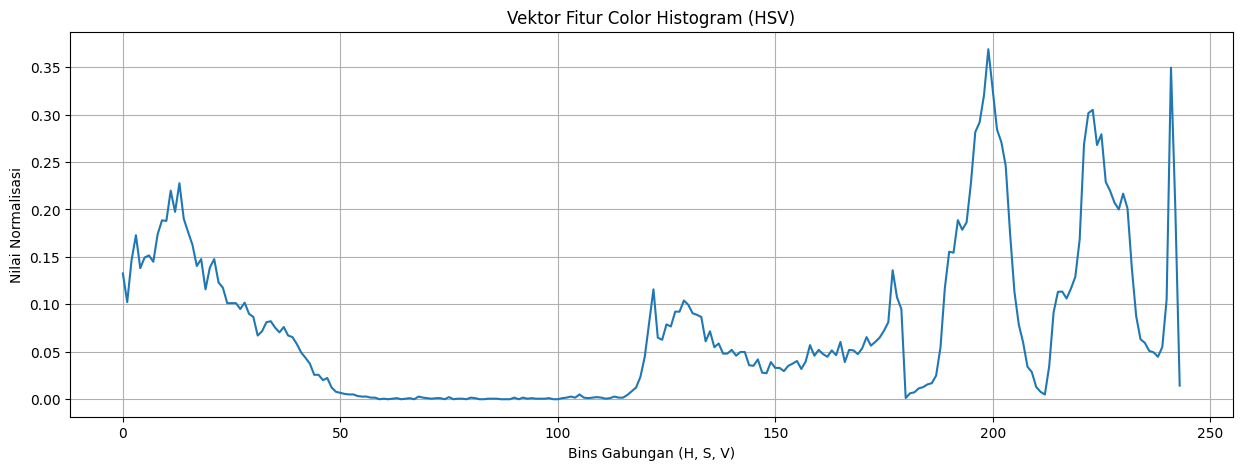

Ukuran vektor fitur Color Histogram: (244,)


In [4]:
color_hist_feats = extract_color_histogram(normalized_color)

plt.figure(figsize=(15, 5))
plt.plot(color_hist_feats)
plt.title('Vektor Fitur Color Histogram (HSV)')
plt.xlabel('Bins Gabungan (H, S, V)')
plt.ylabel('Nilai Normalisasi')
plt.grid(True)
plt.show()

print(f"Ukuran vektor fitur Color Histogram: {color_hist_feats.shape}")

## Visualisasi Fitur LBP (Local Binary Patterns)

LBP adalah deskriptor tekstur yang kuat. Ia bekerja dengan membandingkan piksel dengan tetangganya.

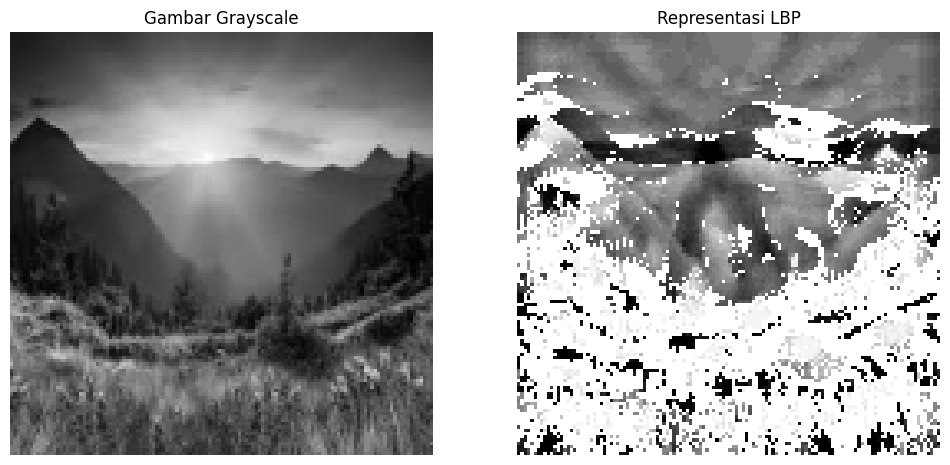

Ukuran vektor fitur LBP (setelah histogram): (26,)


In [5]:
from skimage.feature import local_binary_pattern

radius = 8
n_points = 24
gray_image_uint8 = (normalized_gray * 255).astype(np.uint8)
lbp_image = local_binary_pattern(gray_image_uint8, n_points, radius, method='uniform')
lbp_feats = extract_lbp_features(normalized_gray)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(normalized_gray, cmap='gray')
axes[0].set_title('Gambar Grayscale')
axes[0].axis('off')

axes[1].imshow(lbp_image, cmap='gray')
axes[1].set_title('Representasi LBP')
axes[1].axis('off')

plt.show()

print(f"Ukuran vektor fitur LBP (setelah histogram): {lbp_feats.shape}")

## Menggabungkan Semua Fitur

Terakhir, gabungkan semua fitur menjadi satu vektor panjang yang akan digunakan oleh classifier SVM.

In [6]:
combined_features = extract_features(normalized_gray, normalized_color)

print(f"Ukuran HOG: {hog_feats.shape[0]}")
print(f"Ukuran Color Histogram: {color_hist_feats.shape[0]}")
print(f"Ukuran LBP: {lbp_feats.shape[0]}")
print("---")
print(f"Ukuran Vektor Fitur Gabungan: {combined_features.shape}")

Ukuran HOG: 8100
Ukuran Color Histogram: 244
Ukuran LBP: 26
---
Ukuran Vektor Fitur Gabungan: (8370,)
